In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import shuffle
import scikitplot as skplt 
import keras
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [3]:
data=pd.read_csv('particle_data.csv')
data = shuffle(data)
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('id',axis=1), data['id'],test_size=0.2,random_state=0)

# K - Nearest neighbors method
### Too long run time

In [ ]:
"""knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
predictions = classifier.predict(Y_test)
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=True)"""

# Support Vector Machines
### Again too long run time

In [ ]:
"""from sklearn.svm import SVC
svclassifier = SVC(kernel='linear') # or other Gaussian, polynomial, sigmoid, or computable
svclassifier.fit(X_train, Y_train)
predictions = svclassifier.predict(X_test)"""

# Decision tree

### Default

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
predictions = classifier.predict(X_test)

### Analysis of the performance for the test data

In [14]:
print('Accuracy:',accuracy_score(Y_test, predictions))

Accuracy: 0.958519


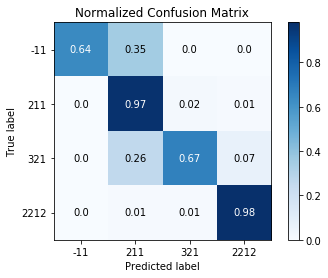

In [7]:
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=True)

In [9]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         -11       0.63      0.64      0.63      2931
         211       0.97      0.97      0.97    560915
         321       0.67      0.67      0.67     46530
        2212       0.98      0.98      0.98    389624

    accuracy                           0.96   1000000
   macro avg       0.81      0.82      0.81   1000000
weighted avg       0.96      0.96      0.96   1000000



### Analysis of the performance for the training data

In [15]:
predictions = classifier.predict(X_train)

In [16]:
print('Accuracy:',accuracy_score(Y_train, predictions))

Accuracy: 0.9999995


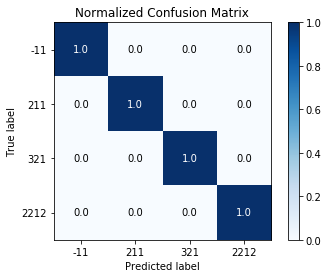

In [18]:
skplt.metrics.plot_confusion_matrix(Y_train, predictions, normalize=True)

In [19]:
print(classification_report(Y_train, predictions))

              precision    recall  f1-score   support

         -11       1.00      1.00      1.00     11916
         211       1.00      1.00      1.00   2245918
         321       1.00      1.00      1.00    185941
        2212       1.00      1.00      1.00   1556225

    accuracy                           1.00   4000000
   macro avg       1.00      1.00      1.00   4000000
weighted avg       1.00      1.00      1.00   4000000



### Conclusion:
* it seems that it learns very well but the performance for the training data is not so good, maybe the problem of the <b> OVERFITTING </b> exists
* better results than for the logistic regression
* worse than for neural networks
* similar problem that existed for the logistic regression, doesn't identify very well the rare particles. 

Very complex tree

### Tree pre-pruning to elimnate overfitting

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)

Accuracy: 0.961128


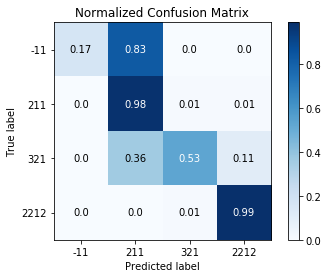

In [9]:
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, predictions))
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=True)

### What max depth is the best?

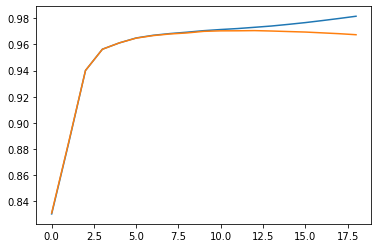

In [17]:
acc_train=[]
acc_test=[]

for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, Y_train)
    
    predictions = clf.predict(X_test)
    acc_test.append(accuracy_score(Y_test, predictions))
    
    predictions = clf.predict(X_train)
    acc_train.append(accuracy_score(Y_train, predictions))
    
plt.plot(acc_train)
plt.plot(acc_test)

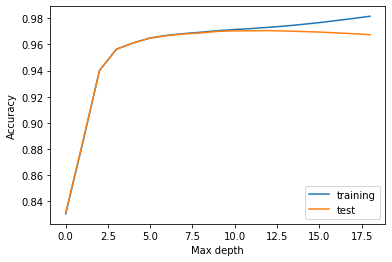

In [19]:
plt.plot(acc_train,label='training')
plt.plot(acc_test,label='test')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()

10 seems optimal.

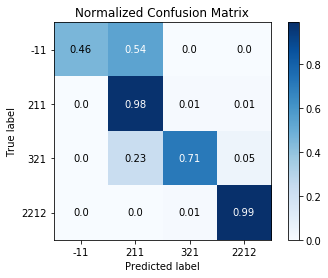

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=True)

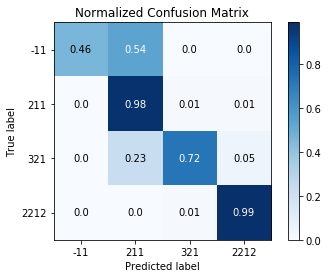

In [21]:
predictions = clf.predict(X_train)
skplt.metrics.plot_confusion_matrix(Y_train, predictions, normalize=True)

Better results than without pre pruning. Overfitting seems to be elimnated but still the model has a problem to detect -11. Worse results than for neural networks.

### Chosen Decision Tree Visualization

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf, out_file=None,feature_names=['p','theta','beta','nphe','ein','eout'], class_names=['-11', '211', '321','2212'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))